# Regularization

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


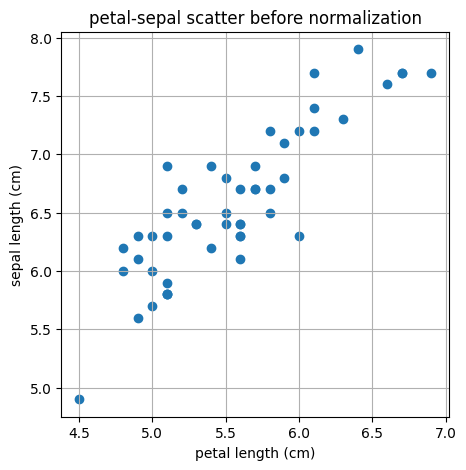

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

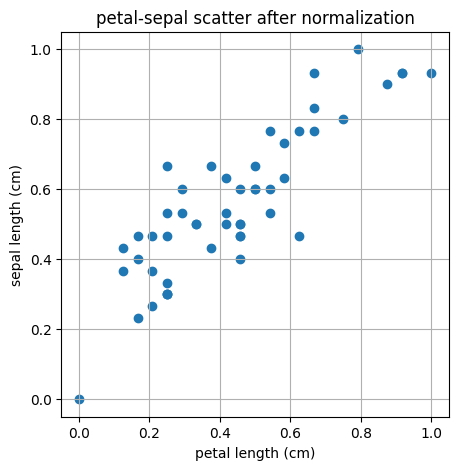

In [4]:
# min max scaling

from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [16]:
# 선형 회귀

from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

model = LinearRegression()

model.fit(X.reshape(-1, 1), Y)

a, b = model.coef_, model.intercept_
print(f"기울기 : {a[0]:0.2f}, 절편 : {b:0.2f}")

기울기 : 1.00, 절편 : 1.06


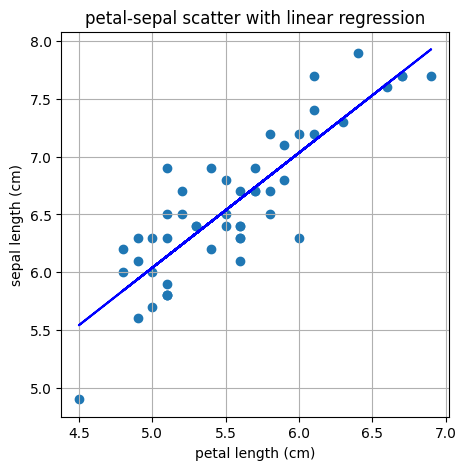

In [17]:
# 시각화

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X, model.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


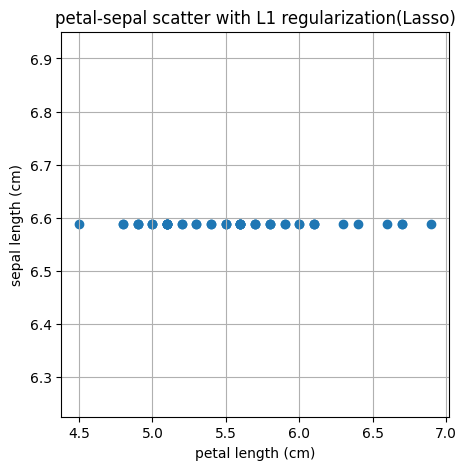

In [21]:
# Lasso, Ridge Regularization

from sklearn.linear_model import Lasso

L1 = Lasso()

L1.fit(X.reshape(-1, 1), Y)
a, b = L1.coef_, L1.intercept_
print(f"기울기 : {a[0]:0.2f}, 절편 : {b:0.2f}")

plt.figure(figsize=(5,5))
plt.scatter(X, L1.predict(X.reshape(-1, 1)))
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


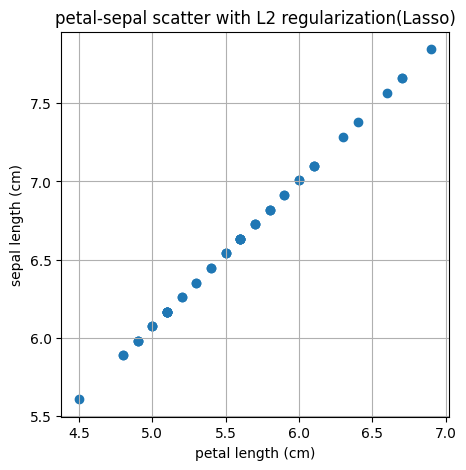

In [23]:
# Lasso, Ridge Regularization

from sklearn.linear_model import Ridge

L2 = Ridge()

L2.fit(X.reshape(-1, 1), Y)
a, b = L2.coef_, L2.intercept_
print(f"기울기 : {a[0]:0.2f}, 절편 : {b:0.2f}")

plt.figure(figsize=(5,5))
plt.scatter(X, L2.predict(X.reshape(-1, 1)))
plt.title('petal-sepal scatter with L2 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### L1 Regularization

In [25]:
# wine dataset

from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [27]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
target_df.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [37]:
# 선형 회귀

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

a = model.coef_

print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("mean squared error", mean_squared_error(y_test, y_pred))
print("root mean squared error", root_mean_squared_error(y_test, y_pred))

print(f"기울기 : {a}")




mean absolute error 0.20304725956612976
mean squared error 0.06853348464256043
root mean squared error 0.2617890078719128
기울기 : [[-1.09279520e-01  4.33504334e-02 -2.04972602e-01  4.40282611e-02
   3.77391056e-05  1.52212162e-01 -3.53372029e-01 -3.20200804e-01
   1.75960551e-02  7.68233961e-02 -9.13449280e-02 -2.81542501e-01
  -6.97267143e-04]]


In [38]:
# Lasso L1 Regularization

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

model = Lasso()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("mean absolute error", mean_absolute_error(y_test, y_pred))
print("mean squared error", mean_squared_error(y_test, y_pred))
print("root mean squared error", root_mean_squared_error(y_test, y_pred))

print(f"기울기 : {model.coef_}")

mean absolute error 0.48021869311322174
mean squared error 0.3265891960765337
root mean squared error 0.5714798299822433
기울기 : [ 0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.00158765]


In [40]:
# L1 regularization iteration 5

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)

In [44]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
y_pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.2484576884176944
Mean Squared Error: 0.1026298911034127
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/Users/zave/anaconda3/envs/aiffel-research/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [45]:
# L2 regularization iteration 5

from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
y_pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795574
Mean Root Squared Error: 0.3250857803841253


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


### Lp norm
* Norm 용어는 벡터뿐만 아니라 함수, 행렬의 크기를 나타내는 개념이다.

In [51]:
# vector norm

x = np.array([1, 10, 1, 1, 1])
p = 5

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p)**(1/p))

print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [47]:
# p 가 무한대인 infinity norm의 경우는 x에서 가장 큰 숫자를 출력한다.
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


### Matrix norm
* 행렬의 norm의 경우는 벡터와 조금 다르며, 주로 p = 1, 무한 인 경우만 알면된다.
* p = 1인 경우에는 컬럼의 합이 가장 큰 값이 출력되고, p = 무한인 경우에는 로우의 합이 가장 큰 값이 출력된다.

In [53]:
# matrix norm

A = np.array([[1, 2, 3], [1, 2, 3], [4, 6, 8]])

one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A:", one_norm_A)

inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A:", inf_norm_A)

result one norm of A: 14.0
result inf norm of A: 18.0
